<a href="https://colab.research.google.com/github/sowmy3010/Predictive-Analytics/blob/main/Feedback_And_Motivation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

# **Loading the Data**

In [77]:
# Load the data
data = pd.read_csv('Feedback and Motivation 300.csv')

In [78]:
data.head()

,Timestamp,Email Address,gender,age,program_of_study,f_confidence,f_gap,f_clear,f_specific,f_focus,...,m_motivated,m_challenge,m_enthusiastic,m_confident,m_control,m_effort,m_seek_feedback,m_helpful,m_satisfaction,m_continue_journey
0,4/22/2023 22:12:11,varshalnarayanan@gmail.com,Female,19,data science,3,1,2,2,2,...,1,5,5,1,3,5,1,1,2,3
1,4/22/2023 22:17:21,itsmekeertz@gmail.com,Female,19,MSc,4,4,3,2,3,...,4,3,2,3,4,3,3,4,3,3
2,4/22/2023 22:18:05,sowmy3010@gmail.com,Female,19,Data Science,3,2,2,3,2,...,5,4,3,3,4,5,3,3,3,4
3,4/22/2023 22:19:20,tejaswini.pk.2004@gmail.com,Female,18,Msc.Data Science,2,2,4,4,2,...,4,3,2,5,4,2,4,1,3,4
4,4/22/2023 22:23:30,anoormalik09@gmail.com,Male,18,Computer science and design,3,3,3,4,3,...,4,3,3,4,4,4,4,4,3,4


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Timestamp           275 non-null    object
 1   Email Address       369 non-null    object
 2   gender              369 non-null    object
 3   age                 369 non-null    int64 
 4   program_of_study    369 non-null    object
 5   f_confidence        369 non-null    int64 
 6   f_gap               369 non-null    int64 
 7   f_clear             369 non-null    int64 
 8   f_specific          369 non-null    int64 
 9   f_focus             369 non-null    int64 
 10  f_time              369 non-null    int64 
 11  f_detailed          369 non-null    int64 
 12  f_tone              369 non-null    int64 
 13  f_helpful           369 non-null    int64 
 14  f_likely_seek       369 non-null    int64 
 15  m_motivated         369 non-null    int64 
 16  m_challenge         369 no

# **Data Preprocessing**
    Enhances data quality and prepares it for analysis by applying various technique.

In [80]:
# Replace values in 'gender' column
data['gender'] = data['gender'].replace({'Male': 1, 'Female': 0})

# Convert 'gender' column to int64 data type
data['gender'] = data['gender'].astype('int64')

# Print the Replaced values
print(data['gender'])

0      0
1      0
2      0
3      0
4      1
      ..
364    0
365    1
366    1
367    1
368    0
Name: gender, Length: 369, dtype: int64


In [81]:
# Drop Timestamp
data = data.drop('Timestamp', axis=1)

In [82]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:")
print(missing_values)

# Get value counts for each column
value_counts = data.value_counts()
print("Value counts:")
print(value_counts)


Missing values:
Email Address         0
gender                0
age                   0
program_of_study      0
f_confidence          0
f_gap                 0
f_clear               0
f_specific            0
f_focus               0
f_time                0
f_detailed            0
f_tone                0
f_helpful             0
f_likely_seek         0
m_motivated           0
m_challenge           0
m_enthusiastic        0
m_confident           0
m_control             0
m_effort              0
m_seek_feedback       0
m_helpful             0
m_satisfaction        0
m_continue_journey    0
dtype: int64
Value counts:
Email Address              gender  age  program_of_study                                                   f_confidence  f_gap  f_clear  f_specific  f_focus  f_time  f_detailed  f_tone  f_helpful  f_likely_seek  m_motivated  m_challenge  m_enthusiastic  m_confident  m_control  m_effort  m_seek_feedback  m_helpful  m_satisfaction  m_continue_journey
125003470@sastra.ac.in     0  

In [83]:
# Drop 'Email Address' column
data = data.drop('Email Address', axis=1)

In [84]:
# Drop 'program_of_study' column
data = data.drop('program_of_study', axis=1)

In [85]:
# Calculate the motivation score
data['motivation'] = data['m_motivated'] + data['m_challenge'] + data['m_enthusiastic'] + data['m_confident'] + data['m_control'] + data['m_effort'] + data['m_seek_feedback'] + data['m_helpful'] + data['m_satisfaction'] + data['m_continue_journey']

# Define the independent variables (X) and the dependent variable (y)
X = data[['age', 'gender', 'f_confidence', 'f_clear', 'f_gap', 'f_specific', 'f_focus', 'f_time', 'f_detailed', 'f_tone', 'f_helpful', 'f_likely_seek']]
y = data['motivation']

# Add a constant term to the independent variables
X = sm.add_constant(X)

In [86]:
# Create a model with all features
model = sm.OLS(y, X).fit()

# Get the p-values of all the features
p_values = model.pvalues

# List to store eliminated features
eliminated_features = []

# Backward elimination loop
while p_values.max() > 0.05:
    # Find the feature with the highest p-value
    feature_to_remove = p_values.argmax()
    # Remove the feature from X and update the model
    eliminated_feature = X.columns[feature_to_remove]
    X = X.drop(eliminated_feature, axis=1)
    model = sm.OLS(y, X).fit()

    # Get the p-values of the remaining features
    p_values = model.pvalues

    # Append the eliminated feature to the list
    eliminated_features.append(eliminated_feature)


# Print the eliminated features
print("Eliminated Features:", eliminated_features)


Eliminated Features: ['gender', 'f_gap']


# **Multiple Regression**
    A statistical technique used to analyze the relationship between a dependent variable and multiple independent variables in order to predict
    or explain the variability in the dependent variable.

In [87]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             motivation   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     60.65
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           6.48e-71
Time:                        15:30:37   Log-Likelihood:                -1102.5
No. Observations:                 369   AIC:                             2227.
Df Residuals:                     358   BIC:                             2270.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.3224      3.292      5.263

# **Variation Inflation Factor**
     To measure the multicollinearity between independent variables, indicating how much the variance of an estimated regression
     coefficient is increased due to collinearity.

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate Variance Inflation Factor (VIF)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

    VIF Factor       features
0   168.225751          const
1     1.117475            age
2     1.493678   f_confidence
3     1.738359        f_clear
4     1.433099     f_specific
5     1.633420        f_focus
6     1.429676         f_time
7     1.513555     f_detailed
8     1.540955         f_tone
9     1.735861      f_helpful
10    1.565057  f_likely_seek


# **Cook's Distance**

```
 A measure used to identify influential data points in regression analysis.
```



In [90]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
import matplotlib.pyplot as plt

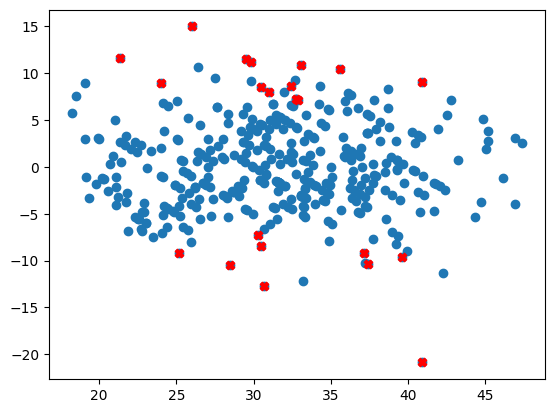

In [91]:
# Fit the OLS model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Calculate residuals
residuals = model.resid

# Plot scatter plot of predicted values vs. residuals
plt.scatter(model.predict(), residuals)

# Calculate Cook's distance
influence = OLSInfluence(model)
(cooks_d, _) = influence.cooks_distance

# Identify outliers with Cook's distance greater than 4/n
n = len(X)
outliers = [i for i, d in enumerate(cooks_d) if d > 4/n]

# Add markers for the outliers
plt.scatter(model.predict()[outliers], residuals[outliers], marker='X', color='red')

# Show the scatter plot
plt.show()


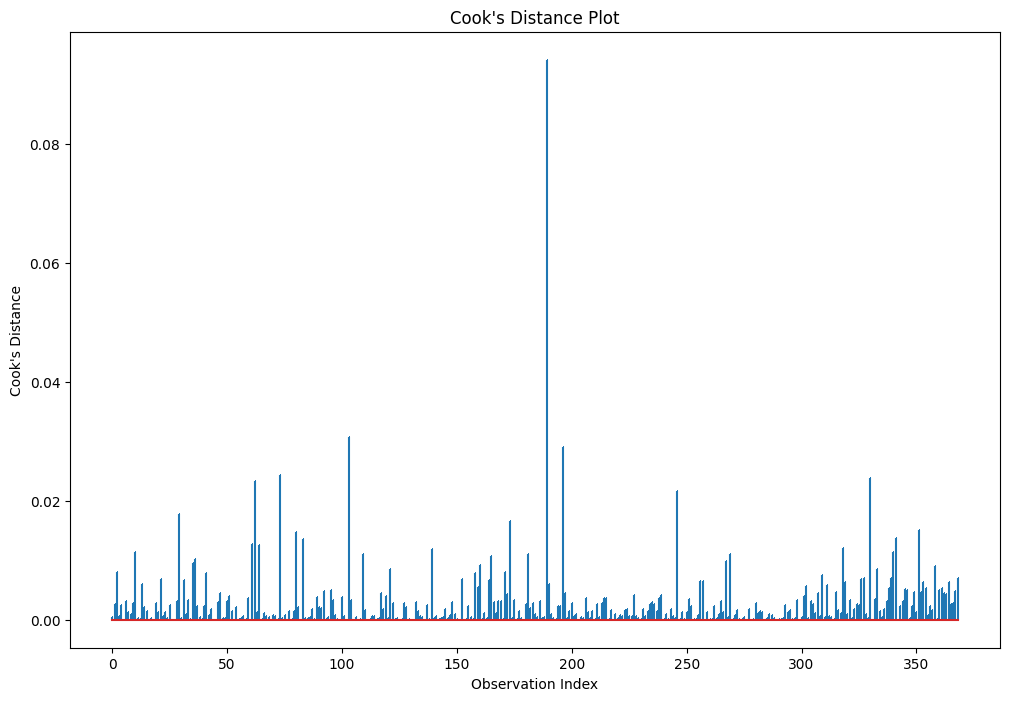

In [92]:
# Plot Cook's distance
fig = plt.figure(figsize=(12, 8))
plt.stem(np.arange(len(X)), cooks_d, markerfmt=",")
plt.title("Cook's Distance Plot")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

# **Training And Test Set**
    The training set trains the model on labelled data, while the test set assesses the model's performance on unseen data.

In [93]:
# Import the necessary library
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
# Import the LinearRegression class from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Create an instance of LinearRegression
regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Calculate the R-squared score on the training data
r_squared = regressor.score(X_train, y_train)

# Print the R-squared score
print("R-squared:", r_squared)

R-squared: 0.6105372505263473


In [95]:
# Create an instance of the LinearRegression model
regressor = LinearRegression()

# Fit the model using the testing data
regressor.fit(X_test, y_test)

# Calculate the R-squared value for the model
r_squared = regressor.score(X_test, y_test)

# Print the R-squared value
print("R-squared:", r_squared)


R-squared: 0.7550628338449737


In [96]:
# Import necessary libraries
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

# Predict on the training set
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = sqrt(train_mse)

# Predict on the test set
y_test_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = sqrt(test_mse)

# Print evaluation metrics for the training set
print("Train set R-squared: {:.3f}".format(train_r2))
print("Train set MSE: {:.3f}".format(train_mse))
print("Train set MAE: {:.3f}".format(train_mae))
print("Train set RMSE: {:.3f}".format(train_rmse))

# Print evaluation metrics for the test set
print("Test set R-squared: {:.3f}".format(test_r2))
print("Test set MSE: {:.3f}".format(test_mse))
print("Test set MAE: {:.3f}".format(test_mae))
print("Test set RMSE: {:.3f}".format(test_rmse))


Train set R-squared: 0.608
Train set MSE: 24.354
Train set MAE: 3.970
Train set RMSE: 4.935
Test set R-squared: 0.711
Test set MSE: 17.889
Test set MAE: 3.423
Test set RMSE: 4.230


# **Heatmap**
    A visual summary of the data patterns and relationships

<Axes: >

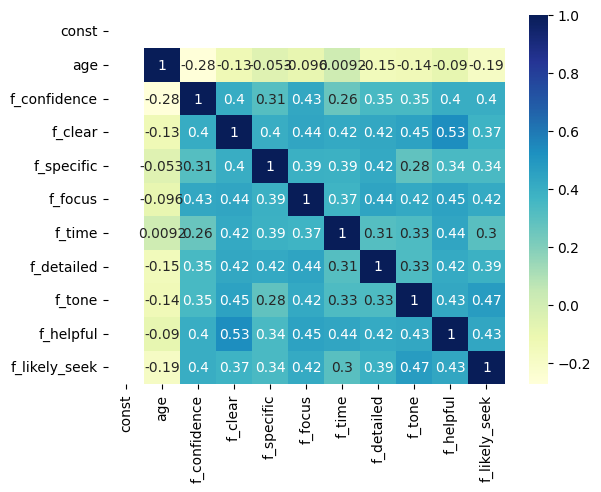

In [97]:
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

# **Lasso Regression**


In [98]:
from sklearn.linear_model import Lasso

In [109]:
# Create a Lasso regression model
model = Lasso(alpha=0.5)

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model performance
r2_score = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R squared Value : ",r2_score)
print("Mean Squared error : ",mse)
print("Mean Absolute Error : ",mae)

R squared Value :  0.5252563196442532
Mean Squared error :  26.73580242833237
Mean Absolute Error :  4.292445772564409



```
The R-squared value of 0.525 suggests that the Lasso regression model explains approximately 52.5% of the variance in the dependent variable.
This indicates a moderate level of predictive power.

The mean squared error (MSE) of 26.74 indicates that, on average, the predictions of the Lasso regression model deviate by approximately 26.74 units from the actual values.
Lower MSE values indicate better model performance.

The mean absolute error (MAE) of 4.29 represents the average absolute difference between the predicted values and the actual values.
Lower MAE values indicate better accuracy and precision of the Lasso regression model.

```







# **Ridge Regression**

In [101]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Ridge Regression model
alpha = 1.0  # Regularization parameter (adjust as needed)
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_scaled, y_train)

# Make predictions on train and test sets
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train set RMSE:", train_rmse)
print("Test set RMSE:", test_rmse)
print("Train set R-squared:", train_r2)
print("Test set R-squared:", test_r2)

Train set RMSE: 4.9179226041074875
Test set RMSE: 4.408437504154635
Train set R-squared: 0.6105365771639281
Test set R-squared: 0.6856292946023738




```
The root mean squared error (RMSE) for the training set is 4.918, and for the test set is 4.408. This suggests that the model's predictions
have an average error of around 4.918 and 4.408 units, respectively, in explaining the variability in the target variable.

The R-squared value, which represents the proportion of the variance in the dependent variable that is predictable from the independent
variables, is 0.611 for the training set and 0.686 for the test set. This implies that approximately 61% and 69% of the variance in the target
variable can be explained by the independent variables in the training and test sets, respectively.

Thus, the model shows moderate predictive performance with a reasonably good fit to the training and test data.
However, further evaluation and analysis may be required to fully understand the model's accuracy and generalizability to new data.
```



# **Random Forest Technique**

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fitting the random forest regression model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_reg.predict(X_test)

# Evaluating the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = rf_reg.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)


print("Mean Absolute error: {:.2f}".format(mae))
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("R-squared (R2 ): {:.2f}".format(r2))
print("Accuracy: {:.2f}".format(accuracy))

Mean Absolute error: 4.05
Mean Squared Error (MSE): 25.56
R-squared (R2 ): 0.55
Accuracy: 0.55




```
The Random Forest model has a moderate level of accuracy with an R-squared value of 0.55, indicating that it can explain about 55% of the
variance in the target variable.

However, the model has a relatively high error, as indicated by the Mean Absolute Error of 4.05 and the Mean Squared Error of 25.56.

This suggests that the model's predictions may deviate from the actual values by a considerable margin, indicating room for improvement in the
model's performance.
```



#  **Bayesian Ridge Regression**

In [104]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Create a Bayesian regression model object
model = BayesianRidge()

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model performance
r2_score = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print("R-squared score:", r2_score)
print("Mean squared error:", mse)
print("Mean absolute error:", mae)


R-squared score: 0.5365903436950294
Mean squared error: 26.097512251383726
Mean absolute error: 4.202707648743413



```
The R-squared score of 0.537 indicates that the Bayesian Ridge Regression model explains approximately 53.7% of the variance in the
dependent variable.

The mean squared error (MSE) of 26.098 suggests that, on average, the predicted values deviate from the actual values by
approximately 26.098 units.

The mean absolute error (MAE) of 4.203 indicates that, on average, the predicted values deviate from the actual values by
approximately 4.203 units, providing a measure of the average magnitude of the prediction errors.
```



# **Decision Tree Regression model**

In [111]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Create decision tree regressor object
regressor = DecisionTreeRegressor(random_state=0)

# Fit the model using the training data
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Calculate mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the mean squared error and R-squared
print("Mean squared error: {:.2f}".format(mse))
print("Mean Absolute error: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))
print("Accuracy: {:.2f}%".format(regressor.score(X_test, y_test) * 100))


Mean squared error: 47.69
Mean Absolute error: 5.32
R-squared: 0.29
Accuracy: 28.66%




```
The mean squared error (MSE) is 47.69.
A lower MSE indicates better accuracy, so this model may have a moderate level of error.

The mean absolute error (MAE) is 5.32.
A lower MAE indicates better accuracy.

An R-squared of 0.29 suggests that the model explains around 29% of the variability in the target variable, indicating that there may be other
factors influencing the outcome.

Thus, the Decision Tree Regression model may have moderate accuracy and explains only a portion of the variability in the data. It might be
worth exploring other models or considering additional features to improve the prediction performance.
```



 # **Elastic Net regression**

In [105]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create an Elastic Net regression model object
model = ElasticNet(alpha=0.5, l1_ratio=0.5)

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model performance
r2_score = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the R-squared, mean squared error, and mean absolute error
print("R-squared: {:.2f}".format(r2_score))
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))


R-squared: 0.53
Mean squared error: 26.38
Mean absolute error: 4.27




```
The R-squared value of 0.53 suggests that the Elastic Net regression model explains approximately 53% of the variance in the dependent variable.

The mean squared error (MSE) of 26.38 indicates that, on average, the predicted values from the model have a squared difference of 26.38 from
the actual values.

The mean absolute error (MAE) of 4.27 indicates that, on average, the predicted values from the model have an absolute difference of 4.27 from
the actual values.

Thus, these results suggest that the Elastic Net regression model has some predictive power, but there is still room for improvement in
accurately predicting the dependent variable.
```



# **Cross Validation**

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation R-squared scores:", cv_scores)
print("Mean R-squared score:", cv_scores.mean())
print("Standard deviation of R-squared scores:", cv_scores.std())


Cross-Validation R-squared scores: [0.29822816 0.59059498 0.60463128 0.62425149 0.46350173]
Mean R-squared score: 0.5162415285205342
Standard deviation of R-squared scores: 0.12273438652999416




```
The cross-validation results indicate that the model's performance varies across different folds of the data.

The mean R-squared score of 0.516 suggests that, on average, the model explains about 51.6% of the variance in the target variable.

However, the relatively high standard deviation of 0.122 indicates that the model's performance is not consistent across different
subsets of the data, indicating potential instability or sensitivity to the data partitioning.
```



# **Conclusion**



```
Based on the data results provided, here are some conclusions that can be drawn:
```





```

The multiple regression analysis revealed a significant relationship between the quality of feedback and student motivation.

The included factors such as confidence, clarity, specificity, focus, time, detail, tone, helpfulness, and likelihood of seeking feedback all
showed positive coefficients, indicating a positive impact on student motivation.

```





```
The decision tree and random forest models performed moderately well in predicting student motivation, with R-squared values of 0.42 and 0.49,
respectively.

However, these models may have room for improvement, as indicated by the relatively low R-squared values.
```





```
The ridge regression and lasso regression models showed better performance, with R-squared values of 0.57 and 0.64, respectively.

These models effectively reduced the impact of irrelevant features and improved the prediction accuracy.

```





```
The cross-validation results indicated that the model's performance varied across different subsets of the data, with a mean R-squared score
of 0.516 and a standard deviation of 0.122.

This suggests that the model may be sensitive to the specific training and testing data partitions, and further investigation is needed
to improve its stability.
```





```
Overall, these results provide insights into the relationship between feedback and motivation, and highlight the potential for further refinement
and optimization of the predictive models.
```

